In [ ]:
!pip install --upgrade numpy==2.0.0
!pip install --upgrade numba tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 77.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully unin

In [ ]:
!pip install --upgrade scipy

In [ ]:
#### creating the creation and annhilation operators

### Annhilation operator
import numpy as np
class Transmon_Anhil:
  def __init__(self,N:int):
    self.N = N
    self.anhil_operator = self.create_anhil_operator()
  def create_anhil_operator(self) ->np.ndarray:
    C=np.zeros((self.N,self.N),dtype=complex)
    for j in range(self.N-1):
      C[j,j+1]=np.sqrt(j+1)
    return C
  def appl_anhil(self,psi:np.ndarray) -> np.ndarray:
    if psi.shape != (self.N,):
      raise ValueError("psi must be a column vector")
    return np.dot(self.anhil_operator,psi)
  def eig_anal(self) -> np.ndarray:
    eigenvalues, _ = np.linalg.eig(self.anhil_operator)
    return eigenvalues

### Creation Operator
class Transmon_Create:
  def __init__(self,N:int):
    self.N = N
    self.create_operator = self.create_create_operator()
  def create_create_operator(self) ->np.ndarray:
    C=np.zeros((self.N,self.N),dtype=complex)
    for j in range(self.N-1):
      C[j+1,j]=np.sqrt(j+1)
    return C
  def appl_create(self,psi:np.ndarray) -> np.ndarray:
    if psi.shape != (self.N,):
      raise ValueError("psi must be a column vector")
    return np.dot(self.create_operator,psi)
  def eig_create(self) -> np.ndarray:
    eigenvalues, _ = np.linalg.eig(self.create_operator)
    return eigenvalues

N = 5
c = Transmon_Create(N)
print("\nThe operator in matrix form\n",np.matrix(c.create_create_operator()))
state = np.array([1,1,0,1,0],dtype = complex)
result = c.appl_create(state)
print("\nthe result on appling on the above state\n",result)
eigenvalues = c.eig_create()
print("\nThe eigenvalues of the above calcualtions are\n",eigenvalues)


The operator in matrix form
 [[0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j]
 [1.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j]
 [0.        +0.j 1.41421356+0.j 0.        +0.j 0.        +0.j
  0.        +0.j]
 [0.        +0.j 0.        +0.j 1.73205081+0.j 0.        +0.j
  0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 2.        +0.j
  0.        +0.j]]

the result on appling on the above state
 [0.        +0.j 1.        +0.j 1.41421356+0.j 0.        +0.j
 2.        +0.j]

The eigenvalues of the above calcualtions are
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


**Calculating for gamma**

In [ ]:
from scipy.sparse.linalg import eigs
E_j = 2.565*10**(-21)
E_c = 5.13*10**(-23)
n_zpf = (E_j/(32*E_c))**(0.25)
phi_zpf = ((2*E_c)/E_j)**(0.25)
n = int(input("enter the value for the n for H_tr : "))
c = Transmon_Create(int(n))
c_dagger = c.create_create_operator()
c_a = Transmon_Anhil(int(n))
c_a1 = c_a.create_anhil_operator()
n_op = 1j*n_zpf*(c_dagger-c_a1)
phi_op = phi_zpf*(c_dagger+c_a1)
H_tr = 4*E_c*np.dot(n_op,n_op) - E_j*np.cos(phi_op)
H_tr_val,H_tr_vec = eigs(H_tr,k=1,which='SM')
### Transmon Hamiltonian ###
H_T = np.sqrt(8*E_c/E_j)*(np.dot(c_dagger,c_a1)+0.5*np.identity(len(c_dagger))) - (E_c/(12*E_j))*(c_dagger + c_a1)**4 - E_j*np.identity(len(c_dagger))
H_T_val,H_T_vec = eigs(H_T,k=1,which='SM')
gamma = H_T_val/10
gamma_n = np.abs(gamma)
exponent = int(np.floor(np.log10(abs(H_T_val[0]))))
# gamma_n = gamma_n*10**(-exponent)
print(f"the value for the gamma is :  {gamma_n}")

enter the value for the n for H_tr : 3
the value for the gamma is :  [0.01999931]


In [ ]:
### Creation of H_int ###
import tensorflow as tf
#input_str = input("Enter h,gamma,E_j1,E_j2,E_c1,E_c2,n1,n2 separated by commas: ")
#h, gamma, E_j1, E_j2, E_c1, E_c2, n1, n2 = map(float, input_str.split(","))
h = 1
# h = 1
E_c = 1
E_j = 100
E_j1 = E_j
E_j2 = E_j
E_c1 = E_c
E_c2 = E_c
n1 = 3
n2 = 3
globals()["E_j1"] = E_j1
globals()["E_j2"] = E_j2
globals()["E_c1"] = E_c1
globals()["E_c2"] = E_c2
# Convert n1 and n2 to integers before passing to class constructors
c_c_1 = Transmon_Create(int(n1))
c_dagger1 = c_c_1.create_create_operator()
c_c_2 = Transmon_Create(int(n2))
c_dagger2 = c_c_2.create_create_operator()
c_a_1 = Transmon_Anhil(int(n1))
c_1 = c_a_1.create_anhil_operator()
c_a_2 = Transmon_Anhil(int(n2))
c_2 = c_a_2.create_anhil_operator()
gamma_n = 0.2
H_int = -( gamma_n /(np.sqrt(32))) * (((E_j1 * E_j2) / (E_c1 * E_c2)) ** (0.25)) * np.kron((c_dagger1 - c_1) , (c_dagger2 - c_2))
omega = []
for i in range(1, 3):
    E_c = globals()[f"E_c{i}"]
    E_j = globals()[f"E_j{i}"]
    omega_i = np.sqrt(E_c * E_j * 8)
    omega.append(omega_i)
def kron_sum(a,b):
  a_0,a_1=a.shape
  b_0,b_1=b.shape
  first_prod = np.kron(a,np.identity(b_0))
  second_prod = np.kron(np.identity(a_0),b)
  return first_prod+second_prod

# # Hamiltonian of composite two transmon system
sum_1=tf.constant(c_dagger1)+tf.constant(c_1)
prod_1 = np.dot(c_dagger1,c_1)
sum_2=tf.constant(c_dagger2)+tf.constant(c_2)
prod_2 = np.dot(c_dagger2,c_2)
Hs_1 = omega[0]*(prod_1+1/2*np.eye(int(c_dagger1.shape[0]),int(c_dagger1.shape[1])))-(E_c1/(12*h))*(np.linalg.matrix_power(sum_1,4))
Hs_2 = omega[1]*(prod_2+1/2*np.eye(int(c_dagger2.shape[0]),int(c_dagger2.shape[1])))-(E_c2/(12*h))*(np.linalg.matrix_power(sum_2,4))
Hs = kron_sum(Hs_1,np.identity(Hs_1.shape[0]))+np.kron(np.identity(Hs_2.shape[0]),Hs_2) + H_int

In [ ]:
Hs

array([[ 28.78427125+0.j,   0.        +0.j,  -0.35355339+0.j,
          0.        +0.j,  -0.35355339+0.j,   0.        +0.j,
         -0.35355339+0.j,   0.        +0.j,   0.        +0.j],
       [  0.        +0.j,  56.56854249+0.j,   0.        +0.j,
          0.35355339+0.j,   0.        +0.j,  -0.5       +0.j,
          0.        +0.j,  -0.35355339+0.j,   0.        +0.j],
       [ -0.35355339+0.j,   0.        +0.j,  85.10281374+0.j,
          0.        +0.j,   0.5       +0.j,   0.        +0.j,
          0.        +0.j,   0.        +0.j,  -0.35355339+0.j],
       [  0.        +0.j,   0.35355339+0.j,   0.        +0.j,
         56.56854249+0.j,   0.        +0.j,  -0.35355339+0.j,
          0.        +0.j,  -0.5       +0.j,   0.        +0.j],
       [ -0.35355339+0.j,   0.        +0.j,   0.5       +0.j,
          0.        +0.j,  84.35281374+0.j,   0.        +0.j,
          0.5       +0.j,   0.        +0.j,  -0.70710678+0.j],
       [  0.        +0.j,  -0.5       +0.j,   0.        +0.j,
   

In [ ]:
H_int

array([[-0.        +0.j,  0.        -0.j, -0.        +0.j,
         0.        -0.j, -0.35355339+0.j,  0.        -0.j,
        -0.        +0.j,  0.        -0.j, -0.        +0.j],
       [-0.        +0.j, -0.        +0.j,  0.        -0.j,
         0.35355339-0.j,  0.        -0.j, -0.5       +0.j,
        -0.        +0.j, -0.        +0.j,  0.        -0.j],
       [-0.        +0.j, -0.        +0.j, -0.        +0.j,
         0.        -0.j,  0.5       -0.j,  0.        -0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j],
       [-0.        +0.j,  0.35355339-0.j, -0.        +0.j,
        -0.        +0.j,  0.        -0.j, -0.        +0.j,
         0.        -0.j, -0.5       +0.j,  0.        -0.j],
       [-0.35355339+0.j, -0.        +0.j,  0.5       -0.j,
        -0.        +0.j, -0.        +0.j,  0.        -0.j,
         0.5       -0.j,  0.        -0.j, -0.70710678+0.j],
       [-0.        +0.j, -0.5       +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.      

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
print(np.kron(Hs_1, np.identity(Hs_1.shape[0])))
np.set_printoptions(threshold=1000)

[[13.89213562+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j -0.35355339+0.j -0.        +0.j
  -0.        +0.j]
 [ 0.        +0.j 13.89213562+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j -0.        +0.j -0.35355339+0.j
  -0.        +0.j]
 [ 0.        +0.j  0.        +0.j 13.89213562+0.j  0.        +0.j
   0.        +0.j  0.        +0.j -0.        +0.j -0.        +0.j
  -0.35355339+0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j 41.67640687+0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  41.67640687+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j 41.67640687+0.j  0.        +0.j  0.        +0.j
   0.        +0.j]
 [-0.35355339+0.j -0.        +0.j -0.        +0.j  0.        +0.j
   0.        +0.j  0.       

**$l_1$-norm quantum coherence**

In [ ]:
omega_0 = np.sqrt(8*E_c*E_j)
omega_0

np.float64(28.284271247461902)

In [ ]:
from scipy.linalg import expm
# from scipy.linalg import matrixexp
omega_0 = np.sqrt(8*E_c*E_j)/h
st_1=np.array([0,1,0])
st_0=np.array([1,0,0])
st_11 = np.kron(st_1,st_1)
st_00 = np.kron(st_0,st_0)
de_11 = np.outer(st_11,st_11.conj().T)
de_00 = np.outer(st_00,st_00.conj().T)
dt = np.arange(0,200,0.001)
time_op = [ _ for j in range(len(dt))]
evolved_dm = []
for i in range(len(dt)):
  time_op[i] = expm(-1j*np.dot(Hs,dt[i]))
  time_op[i] = time_op[i]/np.linalg.norm(time_op[i])
  evolved_dm.append(time_op[i] @ de_11 @ time_op[i].conj().T)

In [ ]:
l1_coher = [0 for k in range(len(evolved_dm))]
for m in range(len(evolved_dm)):
  sum = 0
  for n in range(evolved_dm[m].shape[0]):
    for p in range(evolved_dm[m].shape[1]):
      sum += np.abs(evolved_dm[m][n,p])
  l1_coher[m] = (1/8)*sum*100

In [ ]:
l1_coher

[np.float64(1.3888888888888888),
 np.float64(1.39461687539045),
 np.float64(1.4003510997389845),
 np.float64(1.4060891185966038),
 np.float64(1.41182847875591),
 np.float64(1.4175667193247152),
 np.float64(1.4233013739308074),
 np.float64(1.4290299729440692),
 np.float64(1.434750045713213),
 np.float64(1.4404591228143704),
 np.float64(1.4461547383087203),
 np.float64(1.4518344320063148),
 np.float64(1.4574957517332527),
 np.float64(1.4631362555993073),
 np.float64(1.4687535142631263),
 np.float64(1.4743451131921292),
 np.float64(1.479908654914185),
 np.float64(1.4854417612582307),
 np.float64(1.4909420755809248),
 np.float64(1.4964072649765727),
 np.float64(1.5018350224674393),
 np.float64(1.507223069171737),
 np.float64(1.5125691564465524),
 np.float64(1.5178710680030267),
 np.float64(1.5231266219911725),
 np.float64(1.5283336730517743),
 np.float64(1.533490114332884),
 np.float64(1.5385938794684537),
 np.float64(1.543642944516811),
 np.float64(1.548635329856667),
 np.float64(1.553569

In [ ]:
dt = dt*omega_0

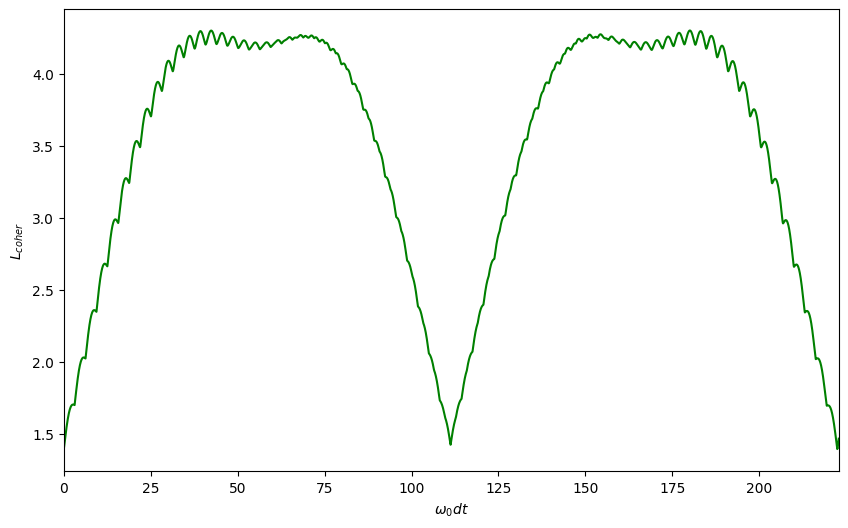

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(dt,l1_coher,color='green')
plt.xlim(0,222.80)
# plt.ylim(0,2.5)
plt.xlabel("$\omega_0dt$")
plt.ylabel("$\it{L}_{coher}$")
plt.savefig("L1-norm-cohere")
plt.show()

In [ ]:
!pip install --upgrade --force-reinstall scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 87.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


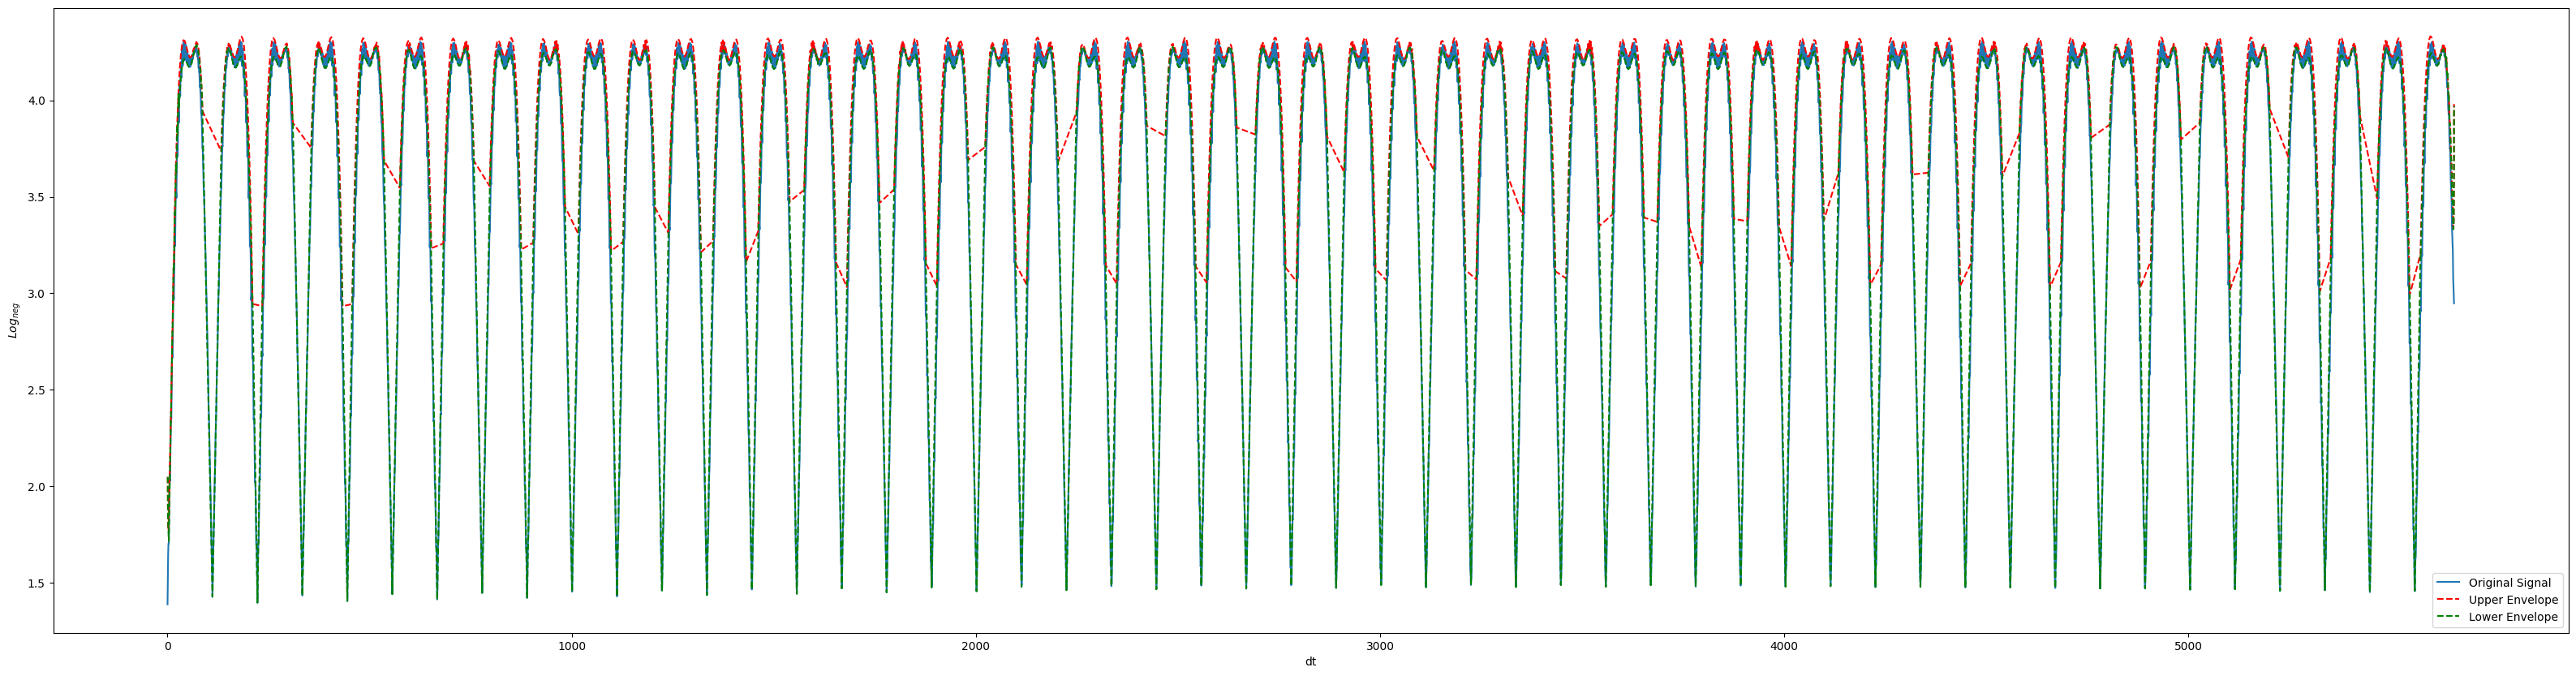

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.signal import argrelextrema


plt.rcParams["figure.figsize"] = (40, 10)
plt.plot(dt, l1_coher, label='Original Signal')

analytic_signal = hilbert(l1_coher)
amplitude_envelope = np.abs(analytic_signal)

upper_envelope_indices = argrelextrema(amplitude_envelope, np.greater)[0]

lower_envelope_indices = argrelextrema(amplitude_envelope, np.less)[0]

plt.plot(dt[upper_envelope_indices], amplitude_envelope[upper_envelope_indices], 'r--', label='Upper Envelope')

plt.plot(dt[lower_envelope_indices], amplitude_envelope[lower_envelope_indices], 'g--', label='Lower Envelope')

plt.xlabel("dt")
plt.ylabel("$\it{Log}_{neg}$")
# plt.xlim(198,200)
# plt.ylim(0,0.40)
plt.legend()
plt.show()

***Logarithmic negativity***

In [ ]:
import numpy as np

def partially_transpose(matrix):
    rows = []
    for i in range(0, 9, 3):
        row_blocks = []
        for j in range(0, 9, 3):
            sub_matrix = matrix[i:i+3, j:j+3]
            row_blocks.append(sub_matrix.T)
        rows.append(np.hstack(row_blocks))
    return np.vstack(rows)

evolved_dm_ppt = []
for matrix in evolved_dm:
    evolved_dm_ppt.append(partially_transpose(matrix))
eig_val=[]
eig_vec = []
for i in range(len(evolved_dm)):
  eigenvalues, eigenvectors = np.linalg.eigh(evolved_dm_ppt[i])
  eig_val.append(-eigenvalues)
  eig_vec.append(eigenvectors)

In [ ]:
neg_val = [0 for k in range(len(eig_val))]
for i in range(len(eig_val)):
  for j in range(len(eig_val[i])):
    if eig_val[i][j] < 0:
      neg_val[i] += eig_val[i][j]

In [ ]:
log_neg = [0 for k in range(len(neg_val))]
for i in range(len(neg_val)):
  log_neg[i] = np.log2(2*np.abs(neg_val[i])+1)*10

In [ ]:
log_neg

[np.float64(2.89506617194985),
 np.float64(2.8978480530522703),
 np.float64(2.900629104478871),
 np.float64(2.9034090377005377),
 np.float64(2.9061875697635915),
 np.float64(2.9089644238787904),
 np.float64(2.911739329992606),
 np.float64(2.9145120253394765),
 np.float64(2.9172822549739537),
 np.float64(2.920049772281611),
 np.float64(2.9228143394677413),
 np.float64(2.9255757280227495),
 np.float64(2.9283337191634673),
 np.float64(2.931088104249392),
 np.float64(2.933838685173113),
 np.float64(2.9365852747241767),
 np.float64(2.9393276969256634),
 np.float64(2.942065787342903),
 np.float64(2.944799393363696),
 np.float64(2.94752837444963),
 np.float64(2.9502526023579314),
 np.float64(2.9529719613335867),
 np.float64(2.9556863482713402),
 np.float64(2.9583956728473435),
 np.float64(2.9610998576202627),
 np.float64(2.9637988381017006),
 np.float64(2.966492562795924),
 np.float64(2.9691809932087865),
 np.float64(2.9718641038260434),
 np.float64(2.974541882061088),
 np.float64(2.977214328

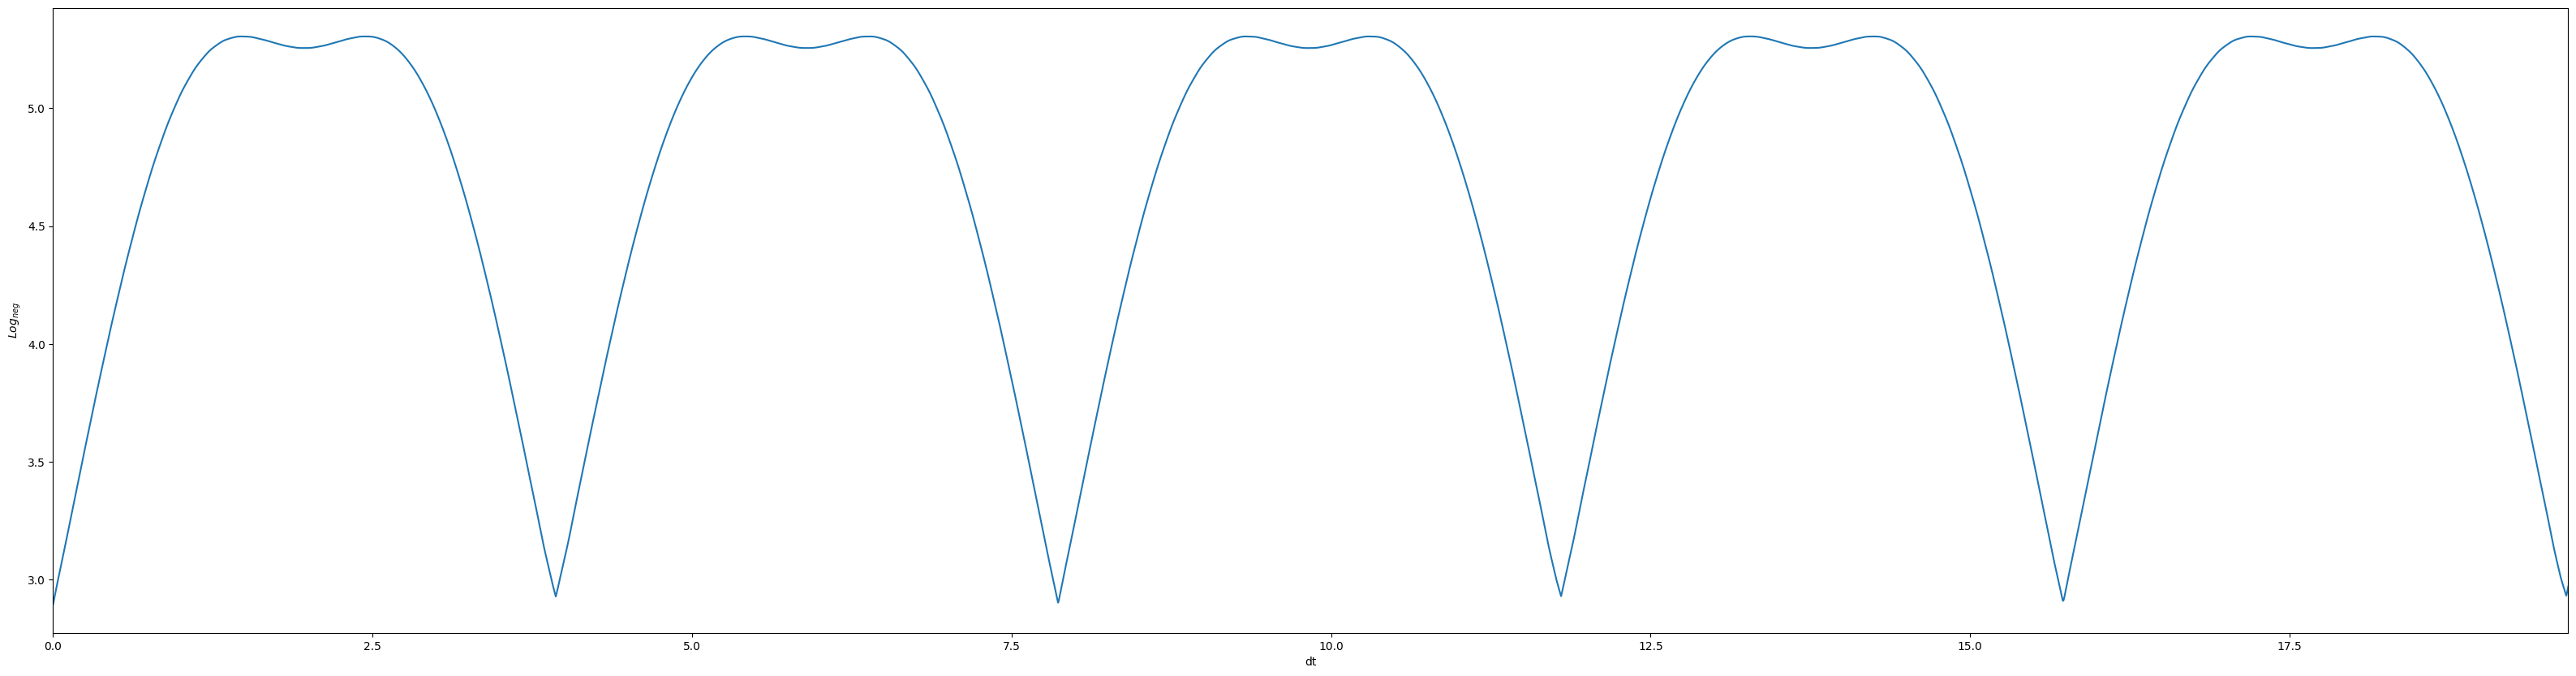

In [ ]:
plt.rcParams["figure.figsize"] = (40,10)
# dt = dt*omega_0
plt.plot(dt,log_neg)
plt.xlim(0,19.68)
# plt.ylim(2.88,2.91)
plt.xlabel("dt")
plt.ylabel("$\it{Log}_{neg}$")
# plt.ylim(0,3.8)
plt.savefig("log neg")
plt.show()

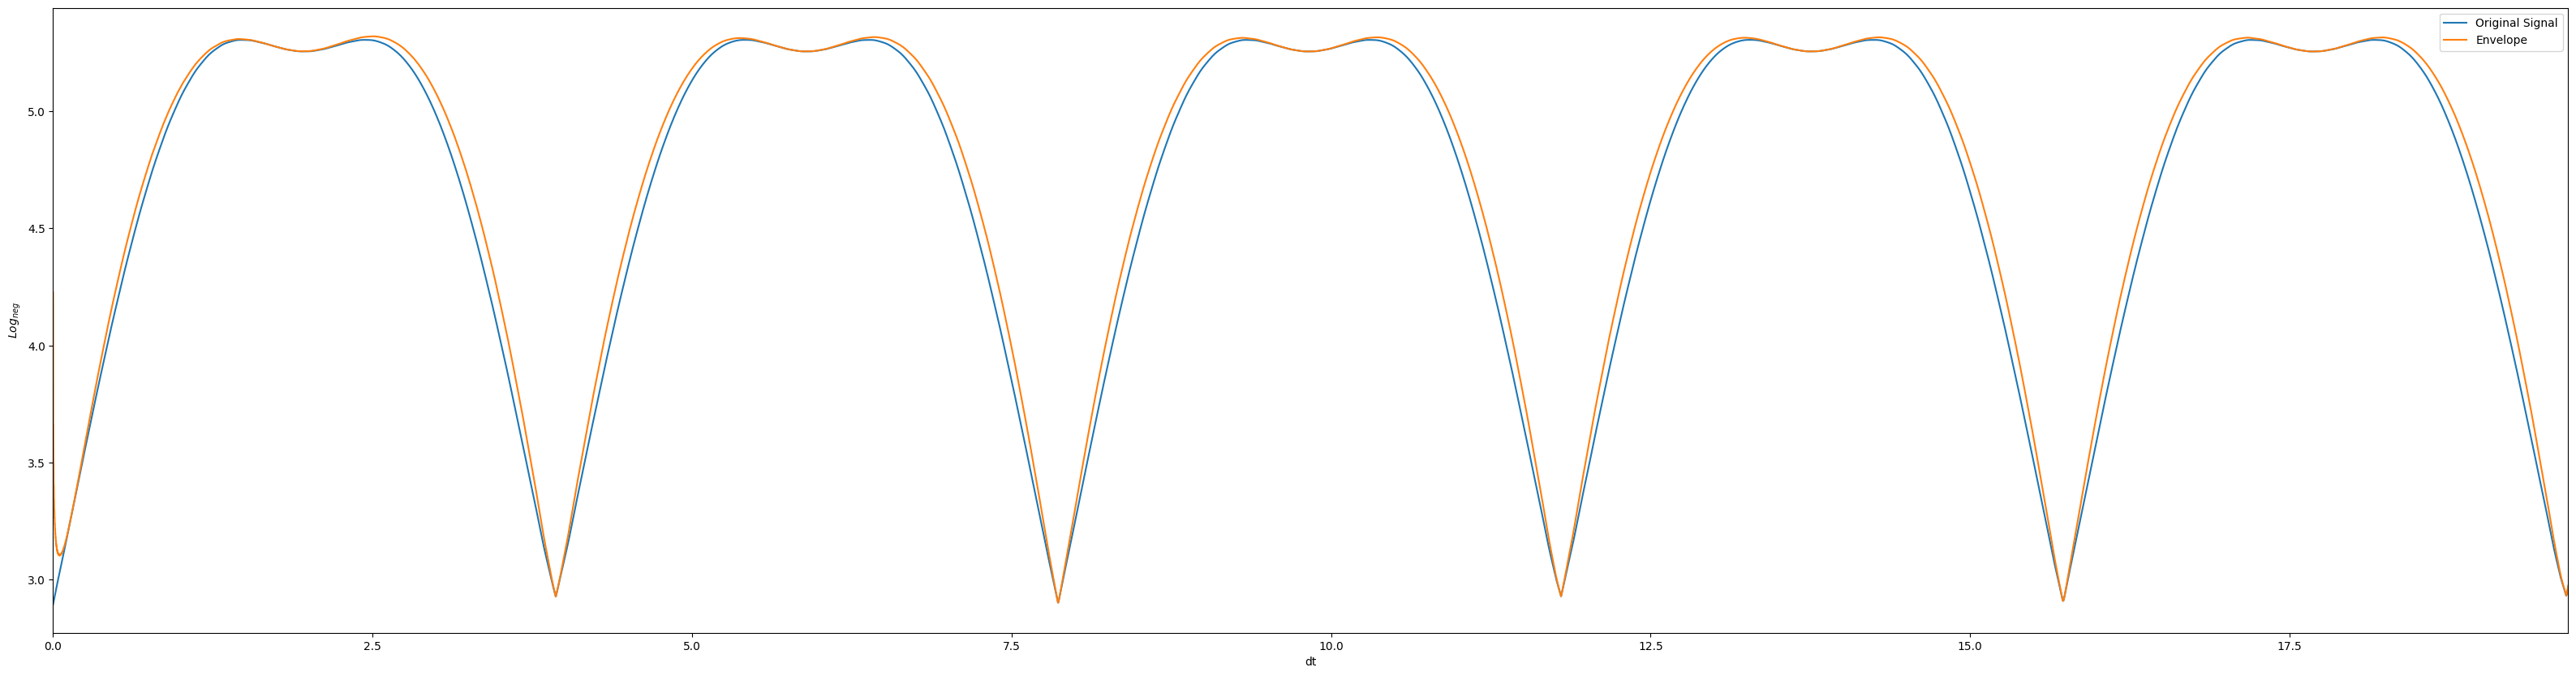

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.signal import find_peaks

plt.rcParams["figure.figsize"] = (40, 10)
plt.plot(dt, log_neg, label='Original Signal')

analytic_signal = hilbert(log_neg)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(dt, amplitude_envelope, label='Envelope')

plt.xlabel("dt")
plt.ylabel("$\it{Log}_{neg}$")
plt.xlim(0,19.68)
# plt.ylim(2.88,2.91)
plt.legend()
plt.show()

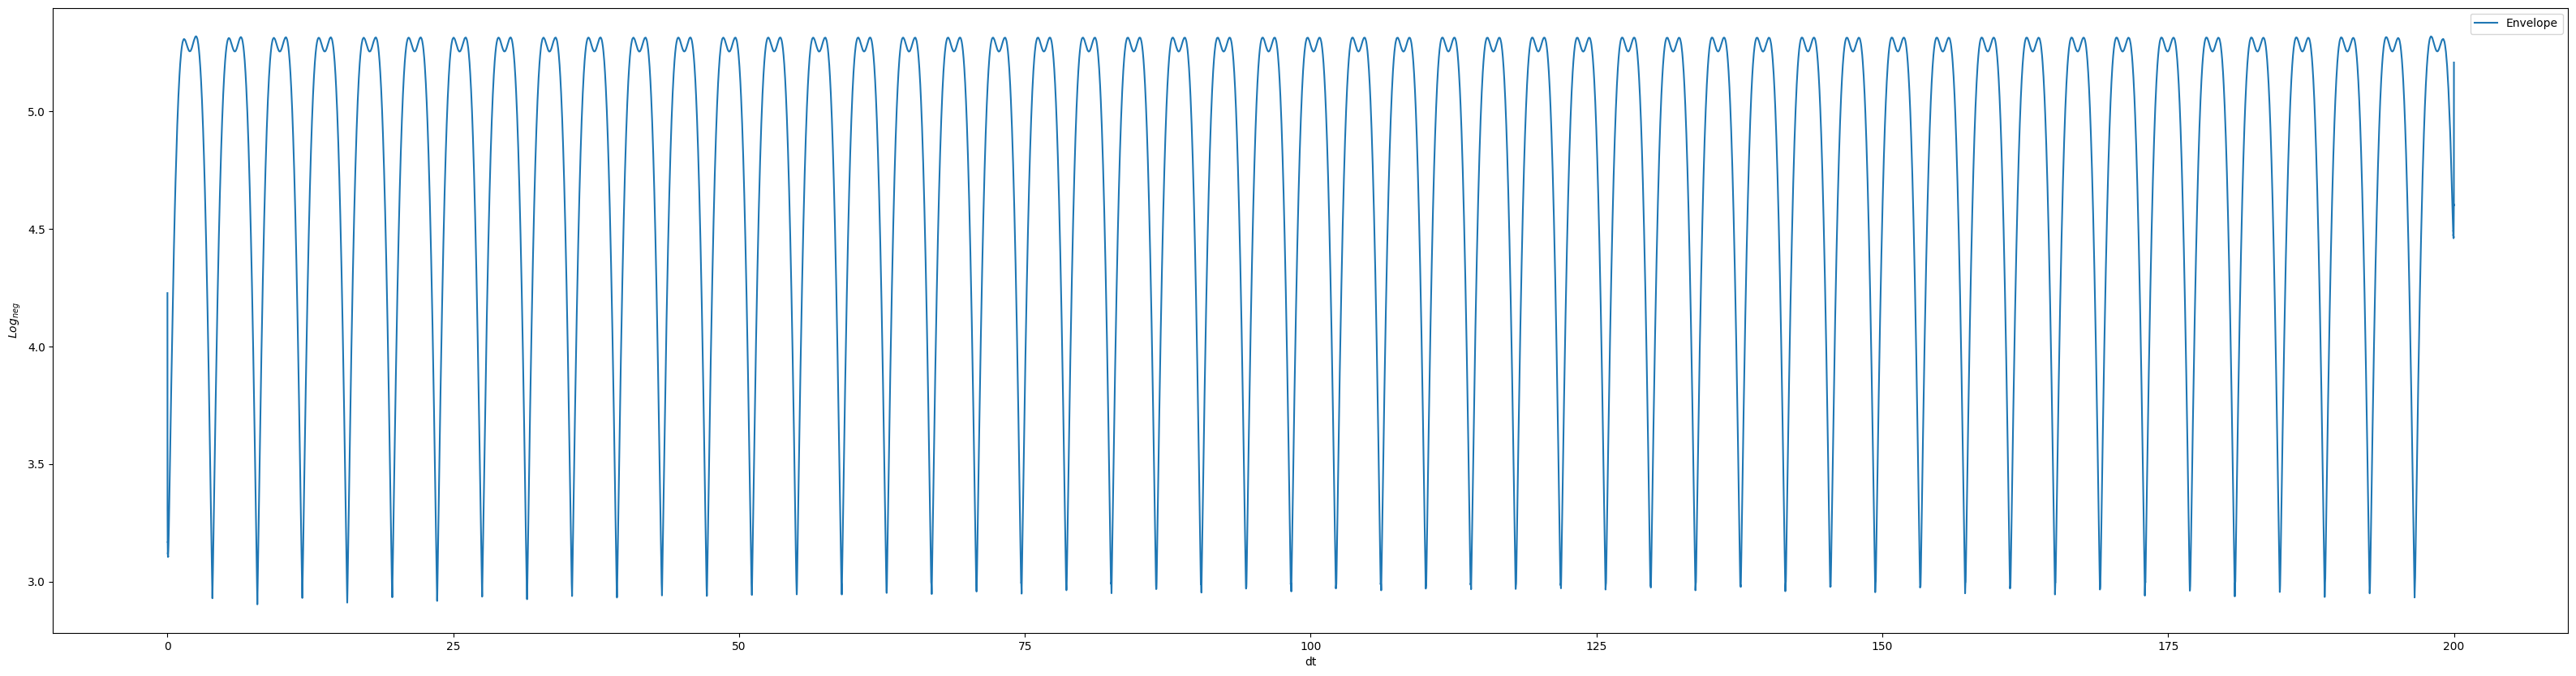

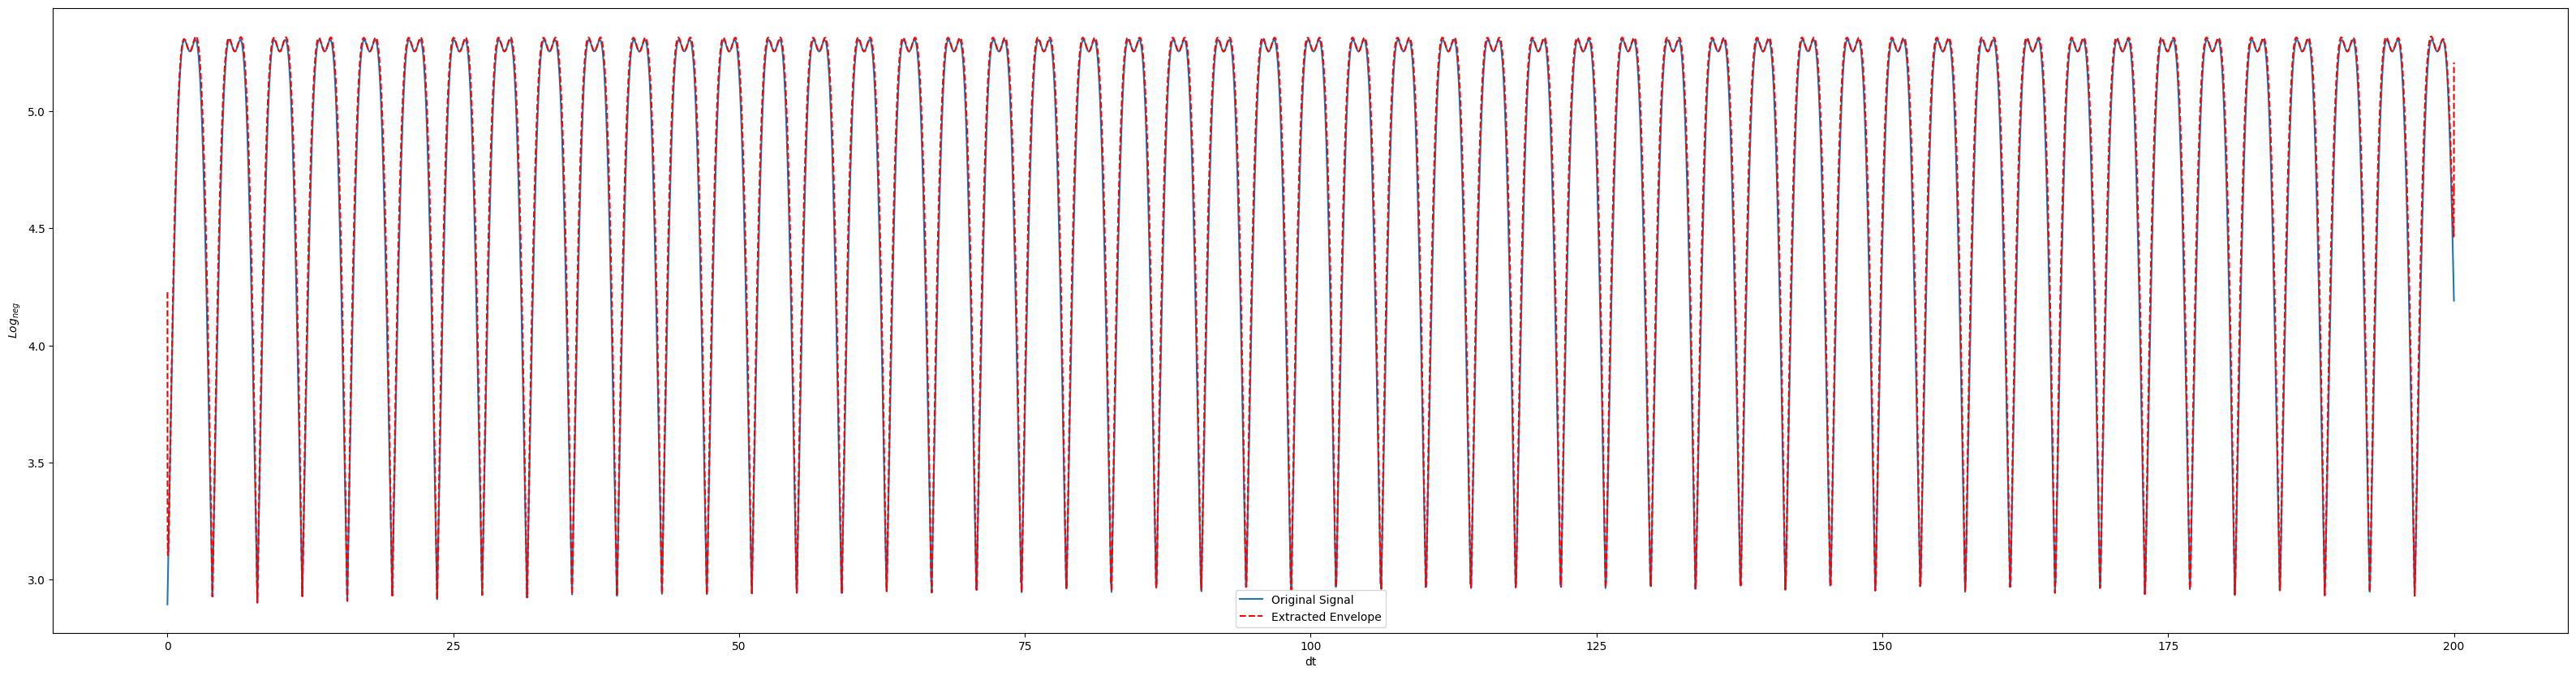

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

plt.rcParams["figure.figsize"] = (40, 10)

analytic_signal = hilbert(log_neg)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(dt, amplitude_envelope, label='Envelope')

plt.xlabel("dt")
plt.ylabel("$\it{Log}_{neg}$")
plt.legend()
plt.show()
step = 1
indices = np.arange(0, len(dt), step)
envelope_values = amplitude_envelope[indices]

plt.plot(dt, log_neg, label='Original Signal')
plt.plot(dt[indices], envelope_values, 'r--', label='Extracted Envelope')

plt.xlabel("dt")
plt.ylabel("$\it{Log}_{neg}$")
plt.legend()
plt.show()

**Cooper Pair operators**

In [15]:
from scipy import linalg as la
N_1 = (E_j1/(32*E_c1))**(0.25)
N_2 = (E_j2/(32*E_c2))**(0.25)
n_1 = -1j*N_1*(c_dagger1-c_1)
n_2 = -1j*N_2*(c_dagger2-c_2)
### defining the charge operators ###
eig_valHs,eig_vecHs = la.eigh(Hs)
q_1initial = [0 for k in range(len(eig_valHs)*len(eig_valHs))]
n_1v = np.kron(n_1,np.identity(3))
n_2v = np.kron(np.identity(3),n_2)

In [33]:
c_dagger1

array([[0.        +0.j, 0.        +0.j, 0.        +0.j],
       [1.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 1.41421356+0.j, 0.        +0.j]])

In [17]:
main_array = eig_vecHs
q1 = np.zeros((len(eig_vecHs), len(eig_vecHs)), dtype=complex)
for i in range(len(eig_vecHs)):
  for j in range(len(eig_vecHs)):
    outer_product_ll = np.outer(main_array[i], main_array[i].conj())
    outer_product_mm = np.outer(main_array[j], main_array[j].conj())
    q1 += outer_product_ll @ n_1v @ outer_product_mm


q2 = np.zeros((len(eig_vecHs), len(eig_vecHs)), dtype=complex)
for i in range(len(eig_vecHs)):
  for j in range(len(eig_vecHs)):
    outer_product_ll = np.outer(main_array[i], main_array[i].conj())
    outer_product_mm = np.outer(main_array[j], main_array[j].conj())
    q2 += outer_product_ll @ n_2v @ outer_product_mm  # @ is matrix multiplication

In [18]:
q1_n = q1*10**(15)
q1_n

array([[0.+2.62050811e-04j, 0.+7.33363599e-02j, 0.+1.23599453e-01j,
        0.+1.32957397e+15j, 0.-1.64175138e-01j, 0.+1.51047658e+00j,
        0.-7.26330752e-05j, 0.+2.14235808e-03j, 0.+1.52772609e-03j],
       [0.-7.14741864e-02j, 0.-3.11007217e-16j, 0.+4.17660078e-01j,
        0.-2.61334792e-01j, 0.+1.32957397e+15j, 0.-1.16228444e+00j,
        0.+4.42629135e-01j, 0.-6.44393880e-02j, 0.-2.85404079e-01j],
       [0.-1.22402511e-01j, 0.-4.17660078e-01j, 0.+8.18264439e-17j,
        0.+1.69461492e+00j, 0.-1.50183685e+00j, 0.+1.32957397e+15j,
        0.+1.68788795e-01j, 0.+3.13003695e-01j, 0.-2.70198144e-01j],
       [0.-1.32957397e+15j, 0.+2.28754403e-01j, 0.-1.64792420e+00j,
        0.+1.30181354e-03j, 0.+5.54230432e-01j, 0.+1.04083418e-01j,
        0.+1.88030155e+15j, 0.+2.02482210e+00j, 0.+2.22914532e+00j],
       [0.+8.43915866e-02j, 0.-1.32957397e+15j, 0.+1.33301843e+00j,
        0.-5.54397815e-01j, 0.+8.67361738e-04j, 0.+4.36779961e-01j,
        0.+1.99805156e+00j, 0.+1.88030155e+1

In [23]:
q2_n = q2*10**(17)
q2_n

array([[0.-1.07016984e-04j, 0.+1.32957397e+17j, 0.-1.33864240e+02j,
        0.+7.25260494e+00j, 0.-3.79511665e+00j, 0.-1.97272256e+01j,
        0.+7.71274320e+00j, 0.-4.84502846e+00j, 0.-7.70027098e+00j],
       [0.-1.32957397e+17j, 0.-8.73723305e+00j, 0.+1.88030155e+17j,
        0.+2.12376571e+01j, 0.+6.61587387e+01j, 0.-3.31074686e+01j,
        0.-4.04370678e+00j, 0.+3.59438872e+01j, 0.+3.72965547e+00j],
       [0.+1.39936767e+02j, 0.-1.88030155e+17j, 0.+1.57420198e+01j,
        0.-3.20788318e+01j, 0.+4.55233221e+01j, 0.+5.90944394e+01j,
        0.-2.36286930e+01j, 0.-9.67386089e+00j, 0.+2.79290480e+01j],
       [0.-7.09416949e+00j, 0.-2.12203776e+01j, 0.+3.20801870e+01j,
        0.+1.26986297e+00j, 0.+1.32957397e+17j, 0.-4.47785019e+01j,
        0.+3.40005801e+01j, 0.-1.73472348e+00j, 0.-5.61984040e-01j],
       [0.+3.71058727e+00j, 0.-6.62577375e+01j, 0.-4.55818964e+01j,
        0.-1.32957397e+17j, 0.+1.25483648e+01j, 0.+1.88030155e+17j,
        0.-8.73875636e-02j, 0.+3.53796314e+0

Lindblad operator generation , alongwith  $S_i(\omega_{nm})$ implementation

In [54]:
from scipy.linalg import expm

pi_nm1 = np.full((q1.shape[0],q1.shape[1]),0,dtype=complex)
### defining constants ###
omega_01 = (eig_valHs[1] - eig_valHs[0])
beta = 5/omega_01
k1=k2=omega_01/20

def pi_1(index_n, index_m):

  n_vec = eig_vecHs[index_n]
  m_vec = eig_vecHs[index_m]

  bra_n = n_vec.conj().T
  q1_m = np.dot(q1, m_vec)
  element_n_q1_m = np.dot(bra_n, q1_m)

  outer_product_nm = np.outer(n_vec, m_vec.conj().T)

  result = np.dot(element_n_q1_m , outer_product_nm)

  return result
def pi_2(index_n, index_m):

  n_vec = eig_vecHs[index_n]
  m_vec = eig_vecHs[index_m]

  bra_n = n_vec.conj().T
  q2_m = np.dot(q2, m_vec)
  element_n_q2_m = np.dot(bra_n, q2_m)

  outer_product_nm = np.outer(n_vec, m_vec.conj().T)

  result = np.dot(element_n_q2_m , outer_product_nm)

  return result
from scipy.linalg import expm
from scipy.special import expit
omega_01 = eig_valHs[1] - eig_valHs[0]
S_omega = np.full((q1.shape[0], q1.shape[1]), 0, dtype=complex)
for i in range(S_omega.shape[0]):
  for j in range(i + 1, S_omega.shape[1]):
    J_1 = ((k1 *(eig_valHs[j] - eig_valHs[i]) )/omega_01) / (1 + (((eig_valHs[j] - eig_valHs[i]) ) / (50 * omega_01)) ** 2) ** 2

    expm_result = expit(- beta * (eig_valHs[j] - eig_valHs[i]) )
    if expm_result.ndim > 0:
        expm_result = expm_result[0, 0]  # Assuming expm returns a 2D array
    S_omega[i, j] = (J_1 / (1 - expm_result))

In [55]:
pi_1(1,2)

array([[0.-1.75805101e-21j, 0.-6.27431395e-35j, 0.+7.84289244e-35j,
        0.-1.02537480e-19j, 0.+1.99807149e-19j, 0.-1.71471904e-19j,
        0.+2.02383389e-34j, 0.+7.37722070e-35j, 0.+1.80475844e-21j],
       [0.-3.58306540e-04j, 0.-1.27876137e-17j, 0.+1.59845172e-17j,
        0.-2.08980568e-02j, 0.+4.07224864e-02j, 0.-3.49475098e-02j,
        0.+4.12475471e-17j, 0.+1.50354365e-17j, 0.+3.67825933e-04j],
       [0.-3.58267152e-04j, 0.-1.27862080e-17j, 0.+1.59827601e-17j,
        0.-2.08957595e-02j, 0.+4.07180099e-02j, 0.-3.49436681e-02j,
        0.+4.12430129e-17j, 0.+1.50337837e-17j, 0.+3.67785499e-04j],
       [0.+2.10966121e-20j, 0.+7.52917674e-34j, 0.-9.41147093e-34j,
        0.+1.23044976e-18j, 0.-2.39768579e-18j, 0.+2.05766285e-18j,
        0.-2.42860066e-33j, 0.-8.85266484e-34j, 0.-2.16571013e-20j],
       [0.+1.24533500e-19j, 0.+4.44448014e-33j, 0.-5.55560017e-33j,
        0.+7.26335656e-18j, 0.-1.41535618e-17j, 0.+1.21464032e-17j,
        0.-1.43360526e-32j, 0.-5.22573641e-3

In [56]:
import numpy as np

# Use np.argwhere to find indices of positive values
positive_indices = np.argwhere(S_omega.real != 0)

if positive_indices.size != 0:
    for row, col in positive_indices:
        print(f"Value at position ({row}, {col}): {S_omega[row, col]}")
else:
    print("No positive values found in S_omega.real")

Value at position (0, 1): (1.3799864362006689+0j)
Value at position (0, 2): (1.4137403969698867+0j)
Value at position (0, 3): (2.7486123050326707+0j)
Value at position (0, 4): (2.806884360933484+0j)
Value at position (0, 5): (2.8277007209466762+0j)
Value at position (0, 6): (4.139479270839963+0j)
Value at position (0, 7): (4.209219036693352+0j)
Value at position (0, 8): (5.557640430140774+0j)
Value at position (1, 2): (0.06533396291115691+0j)
Value at position (1, 3): (1.3932808177906768+0j)
Value at position (1, 4): (1.4505942840228396+0j)
Value at position (1, 5): (1.4711235334002524+0j)
Value at position (1, 6): (2.7891003361022553+0j)
Value at position (1, 7): (2.8596852194560602+0j)
Value at position (1, 8): (4.22830916770911+0j)
Value at position (2, 3): (1.359577259421288+0j)
Value at position (2, 4): (1.4167564411931173+0j)
Value at position (2, 5): (1.4372426066303168+0j)
Value at position (2, 6): (2.7547221587006403+0j)
Value at position (2, 7): (2.825322091257092+0j)
Value a

In [57]:
eig_valHs

array([ 28.77766165,  56.21460589,  56.90924321,  83.92534042,
        85.10281374,  85.52354105, 112.18036142, 113.60704445,
       141.43471185])

In [58]:
S_0 = k1/(omega_01*(1+beta*h))
S_0

np.float64(0.04229273885672251)

**$D_i(\rho_s(t))$ dissipative term development**

In [59]:
import numpy as np

def calculate_D_rho1(de_11,S_omega, k1, omega_01, beta, h):
  D_rho = np.full((S_omega.shape[0], S_omega.shape[1]), 0, dtype=complex)
  positive_indices = np.argwhere(S_omega.real > 0)
  S_0 = k1/(omega_01*(1+beta*h))
  for i in range(q1.shape[0]):
    for j in range(q1.shape[1]):
      D_rho_interim1= S_omega[i][j]*(2*np.dot(np.dot(pi_1(i,j),de_11),pi_1(i,j).conj().T) - np.dot(np.dot(pi_1(i,j).conj().T,pi_1(i,j)),de_11) - np.dot(de_11,np.dot(pi_1(i,j).conj().T,pi_1(i,j))))
      D_rho_interim2= -S_omega[i][j]*(2*np.dot(np.dot(pi_1(i,j).conj().T,de_11),pi_1(i,j)) - np.dot(np.dot(pi_1(i,j),pi_1(i,j).conj().T),de_11) - np.dot(de_11,np.dot(pi_1(i,j),pi_1(i,j).conj().T)))
      D_rho_interim3= S_0*(2*np.dot(np.dot(pi_1(i,i),de_11),pi_1(i,i)) - np.dot(np.dot(pi_1(i,i),pi_1(i,i)),de_11) - np.dot(de_11,np.dot(pi_1(i,i),pi_1(i,i))))
      D_rho += 0.5*(D_rho_interim1+D_rho_interim2+D_rho_interim3)
  return D_rho

def calculate_D_rho2(de_11,S_omega, k1, omega_01, beta, h):
  D_rho = np.full((S_omega.shape[0], S_omega.shape[1]), 0, dtype=complex)
  positive_indices = np.argwhere(S_omega.real > 0)
  S_0 = k1/(omega_01*(1+beta*h))
  for i in range(q2.shape[0]):
    for j in range(q2.shape[1]):
      D_rho_interim1= S_omega[i][j]*(2*np.dot(np.dot(pi_2(i,j),de_11),pi_2(i,j).conj().T) - np.dot(np.dot(pi_2(i,j).conj().T,pi_2(i,j)),de_11) - np.dot(de_11,np.dot(pi_2(i,j).conj().T,pi_2(i,j))))
      D_rho_interim2= -S_omega[i][j]*(2*np.dot(np.dot(pi_2(i,j).conj().T,de_11),pi_2(i,j)) - np.dot(np.dot(pi_2(i,j),pi_2(i,j).conj().T),de_11) - np.dot(de_11,np.dot(pi_2(i,j),pi_2(i,j).conj().T)))
      D_rho_interim3= S_0*(2*np.dot(np.dot(pi_2(i,i),de_11),pi_2(i,i)) - np.dot(np.dot(pi_2(i,i),pi_2(i,i)),de_11) - np.dot(de_11,np.dot(pi_2(i,i),pi_2(i,i))))
      D_rho += 0.5*(D_rho_interim1+D_rho_interim2+D_rho_interim3)
  return D_rho
def calculate_D_rho(de_11,S_omega,k1,omega_01,beta,h):
  D_1 = calculate_D_rho1(de_11,S_omega,k1,omega_01,beta,h)
  D_2 = calculate_D_rho2(de_11,S_omega,k1,omega_01,beta,h)
  result = np.zeros((D_1.shape[0], D_1.shape[1]),dtype = complex)
  for i in range(D_1.shape[0]):
    for j in range(D_1.shape[0]):
      for k in range(D_1.shape[0]):
        result[i][j] += D_1[i][k] * D_2[k][j]
  return result*10**(-47)
### defining the commutation relation ###
def commute_Hs(de_11):
  dom_interim = np.dot(Hs,de_11) - np.dot(de_11,Hs)
  return -1j*dom_interim

In [60]:
omega_01

np.float64(27.436944246797395)

In [61]:
calculate_D_rho(de_11,S_omega,k1,omega_01,beta,h)
# commute_Hs(de_11)

array([[ 1.86478285e-50+0.j,  8.87169411e-64+0.j,  1.16150823e-65+0.j,
         8.48867478e-49+0.j, -2.57622943e-50+0.j,  1.41949879e-48+0.j,
         8.62684625e-64+0.j,  8.83509375e-64+0.j, -1.49355718e-50+0.j],
       [ 8.98590577e-64+0.j,  5.23878820e-52+0.j,  5.34140305e-52+0.j,
         5.21913817e-62+0.j, -5.15899446e-63+0.j,  8.76289522e-62+0.j,
        -2.52922078e-54+0.j,  1.20535754e-53+0.j, -9.27860933e-64+0.j],
       [-1.38151937e-64+0.j,  5.34140305e-52+0.j,  5.24091309e-52+0.j,
        -8.25278632e-63+0.j,  5.49587421e-63+0.j, -1.34881486e-62+0.j,
         2.44712201e-53+0.j, -1.45510478e-53+0.j,  1.38549308e-64+0.j],
       [ 8.48867478e-49+0.j,  5.17450296e-62+0.j,  6.78740737e-64+0.j,
         4.95095947e-47+0.j, -1.50257344e-48+0.j,  8.27941410e-47+0.j,
         5.03156933e-62+0.j,  5.15302328e-62+0.j, -8.71799967e-49+0.j],
       [-1.25147342e-48+0.j, -6.28298583e-62+0.j,  1.24566932e-62+0.j,
        -7.29915860e-47+0.j,  1.90210137e-46+0.j, -1.22062745e-46+0.j,
  

In [62]:
import numpy as np
from scipy.integrate import RK45

def matrix_rk4_step_state_dep(t, Y_flat, dt, commute_Hs, calculate_D_rho, shape):

    Y = Y_flat.reshape(shape)

    def ode_func(t, Y_flat):
        Y = Y_flat.reshape(shape)
        dYdt = commute_Hs(Y) + calculate_D_rho(de_11, S_omega, k1, omega_01, beta, h)
        return dYdt.flatten()

    solver = RK45(ode_func, t, Y_flat, t + dt)


    solver.step()


    Y_next_flat = solver.y

    return Y_next_flat.astype(complex)

def solve_matrix_ode_rk4_state_dep(Y0, t_span, dt, A_func, B_func):
    t_start, t_end = t_span
    times = np.arange(t_start, t_end + dt, dt)
    num_time_points = len(times)
    n, m = Y0.shape
    solutions = np.zeros((num_time_points, n, m), dtype=complex)
    solutions[0] = Y0
    Y_flat = Y0.flatten()

    for i in range(num_time_points - 1):
        Y_flat = matrix_rk4_step_state_dep(times[i], Y_flat, dt, A_func, B_func, (n, m))
        solutions[i + 1] = Y_flat.reshape((n, m)).astype(complex)

    return times, solutions

t_span = (0,10)
dt = 0.01
Y0 = de_00

times, Y_solution = solve_matrix_ode_rk4_state_dep(Y0, t_span, dt, commute_Hs, calculate_D_rho)

In [ ]:
Y_solution

array([[[ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        ...,
        [ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j

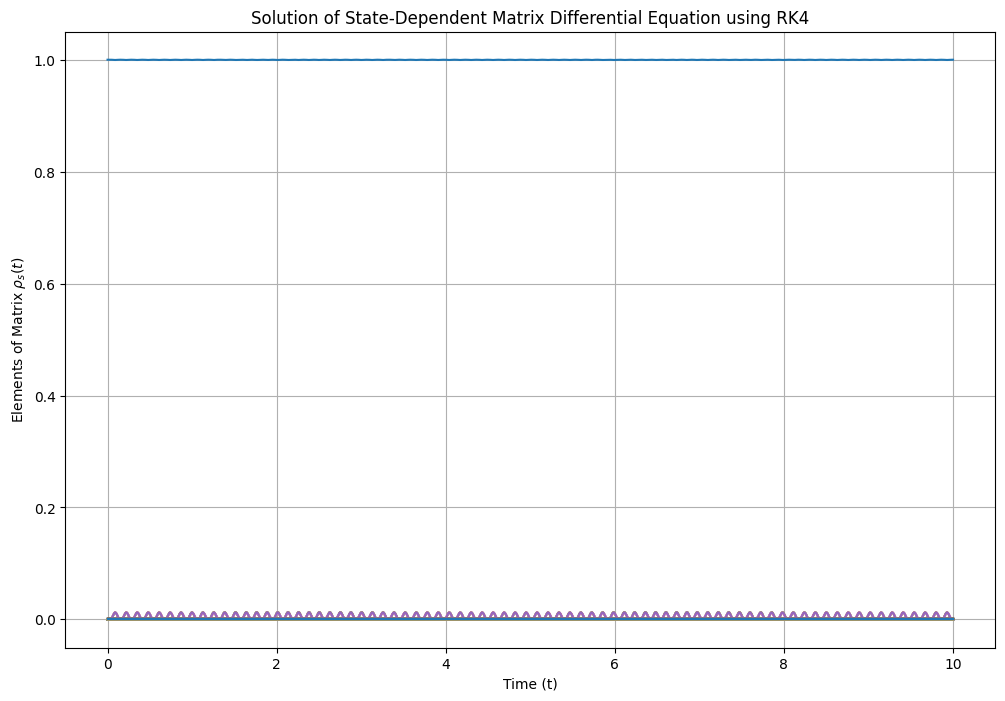

In [63]:
# Plot the results
import matplotlib.pyplot as plt
n_rows, n_cols = Y0.shape
plt.figure(figsize=(12, 8))
for i in range(n_rows):
    for j in range(n_cols):
        plt.plot(times, Y_solution[:, i, j])

plt.xlabel('Time (t)')
plt.ylabel("Elements of Matrix $\it{\\rho_s(t)}$")
plt.title('Solution of State-Dependent Matrix Differential Equation using RK4')
plt.grid(True)
plt.show()

In [ ]:
!pip install qutip

**calculating $L_N$ for the state |11><11|**

In [64]:
import numpy as np
# Y_solution = y_new
def partially_transpose(matrix):
    rows = []
    for i in range(0, 9, 3):
        row_blocks = []
        for j in range(0, 9, 3):
            sub_matrix = matrix[i:i+3, j:j+3]
            row_blocks.append(sub_matrix.T)
        rows.append(np.hstack(row_blocks))
    return np.vstack(rows)

evolved_dm_ppt = []
for matrix in Y_solution:
    evolved_dm_ppt.append(partially_transpose(matrix))
eig_val=[]
eig_vec = []
for i in range(len(Y_solution)):
  # Check if the matrix contains NaN values and replace them with 0
  matrix = evolved_dm_ppt[i]
  matrix = np.nan_to_num(matrix)
  # Now compute eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eigh(matrix)
  eig_val.append(eigenvalues)
  eig_vec.append(eigenvectors)

In [65]:
np.trace(Y_solution[1])

np.complex128(1+0j)

In [66]:
neg_val = [0 for k in range(len(eig_val))]
for i in range(len(eig_val)):
  for j in range(len(eig_val[i])):
    if eig_val[i][j] < 0:
      neg_val[i] += eig_val[i][j]

In [67]:
neg_valn = neg_val
log_neg = [0 for k in range(len(neg_valn))]
for i in range(len(neg_valn)):
  if neg_valn[i] != 0:
    log_neg[i] = np.log2(2*np.abs(neg_valn[i])+1)

In [68]:
times_n =times*omega_0

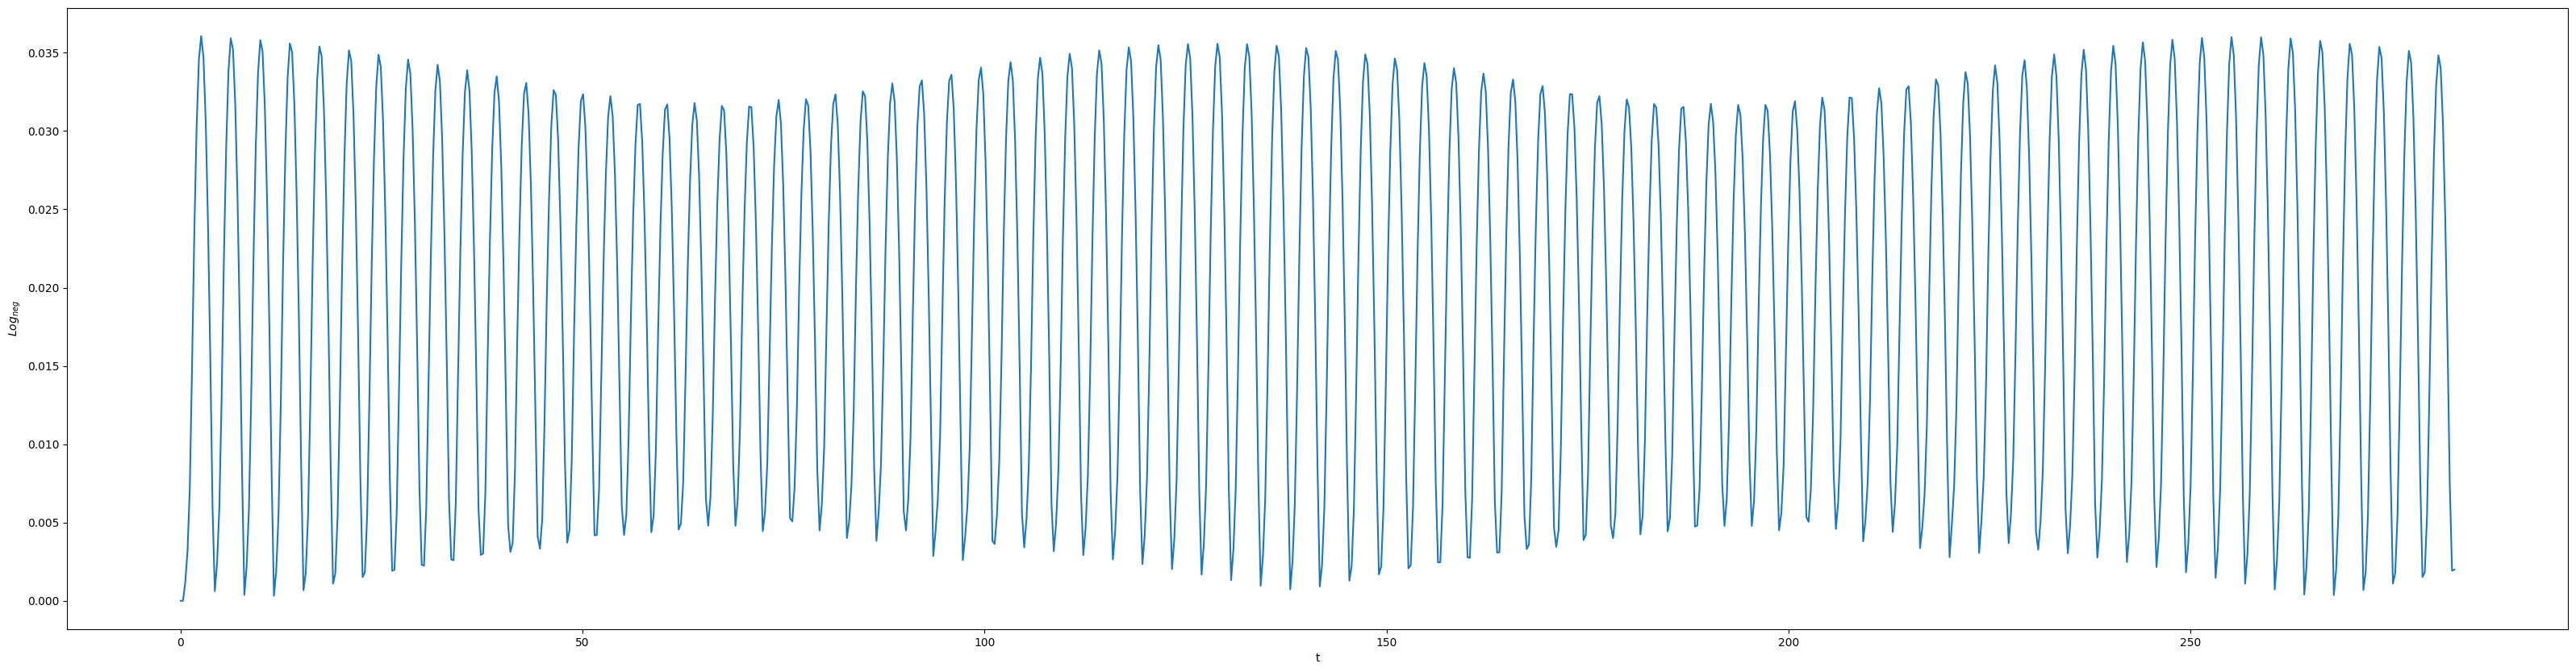

In [70]:
plt.rcParams["figure.figsize"] = (40,10)
plt.plot(times_n,log_neg)
plt.xlabel("t")
plt.ylabel("$\it{Log}_{neg}$")
plt.savefig("log neg")
plt.show()

In [71]:
t_span = (0, 70)
dt = 0.1
Y0 = de_11
times, Y_solution_0 = solve_matrix_ode_rk4_state_dep(Y0, t_span, dt, commute_Hs,calculate_D_rho)


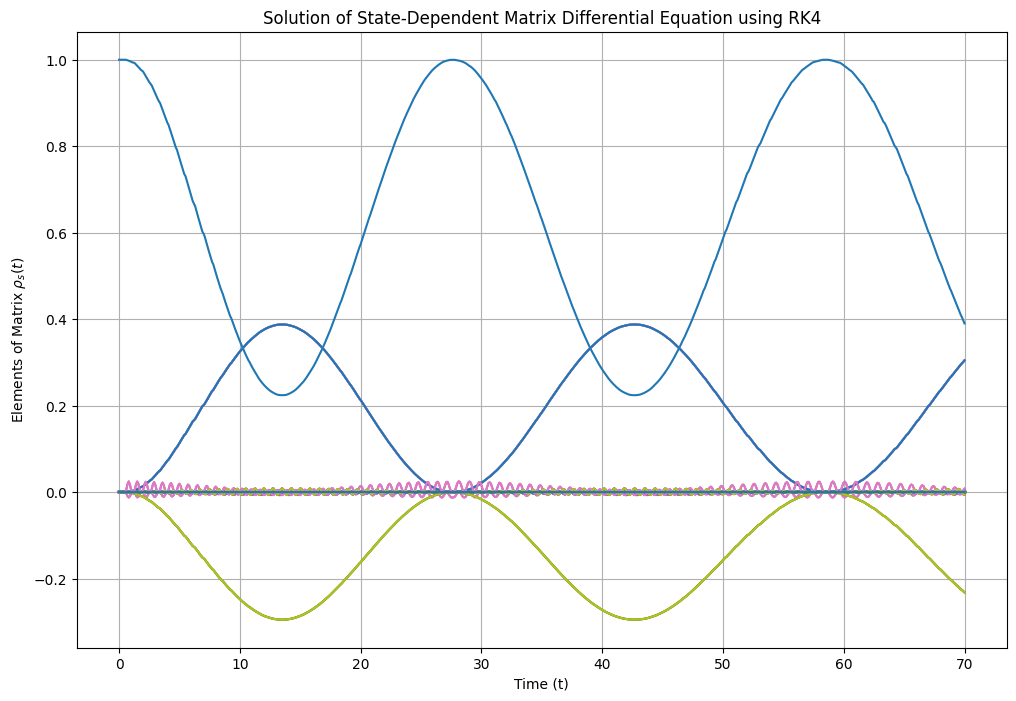

In [72]:
# Plot the results
n_rows, n_cols = Y0.shape
plt.figure(figsize=(12, 8))
for i in range(n_rows):
    for j in range(n_cols):
        plt.plot(times, Y_solution_0[:, i, j])

plt.xlabel('Time (t)')
plt.ylabel("Elements of Matrix $\it{\\rho_s(t)}$")
plt.title('Solution of State-Dependent Matrix Differential Equation using RK4')
# plt.xlim(0,10)
plt.grid(True)
# plt.savefig('state_dependent_matrix_ode_rk4.png')
plt.show()

**calculating $L_N$ for the state |00><00|**

In [107]:
Y_solution_0

array([[[ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        ...,
        [ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j

In [79]:
import numpy as np

def partially_transpose(matrix):
    rows = []
    for i in range(0, 9, 3):
        row_blocks = []
        for j in range(0, 9, 3):
            sub_matrix = matrix[i:i+3, j:j+3]
            row_blocks.append(sub_matrix.T)
        rows.append(np.hstack(row_blocks))
    return np.vstack(rows)

evolved_dm_ppt = []
for matrix in Y_solution_0:
    evolved_dm_ppt.append(partially_transpose(matrix))
eig_val=[]
eig_vec = []
for i in range(len(Y_solution_0)):
  eigenvalues, eigenvectors = np.linalg.eigh(evolved_dm_ppt[i])
  eig_val.append(eigenvalues)
  eig_vec.append(eigenvectors)

In [80]:
neg_val = [0 for k in range(len(eig_val))]
for i in range(len(eig_val)):
  for j in range(len(eig_val[i])):
    if eig_val[i][j] < 0:
      neg_val[i] += eig_val[i][j]

In [81]:
# for j in range(len(neg_val)):
#   neg_val[j] = np.abs(neg_val[j])/1e+106

In [82]:
log_neg = [0 for k in range(len(neg_val))]
for i in range(len(neg_val)):
  if neg_val[i] != 0:
    log_neg[i] = np.log2(2*np.abs(neg_val[i])+1)

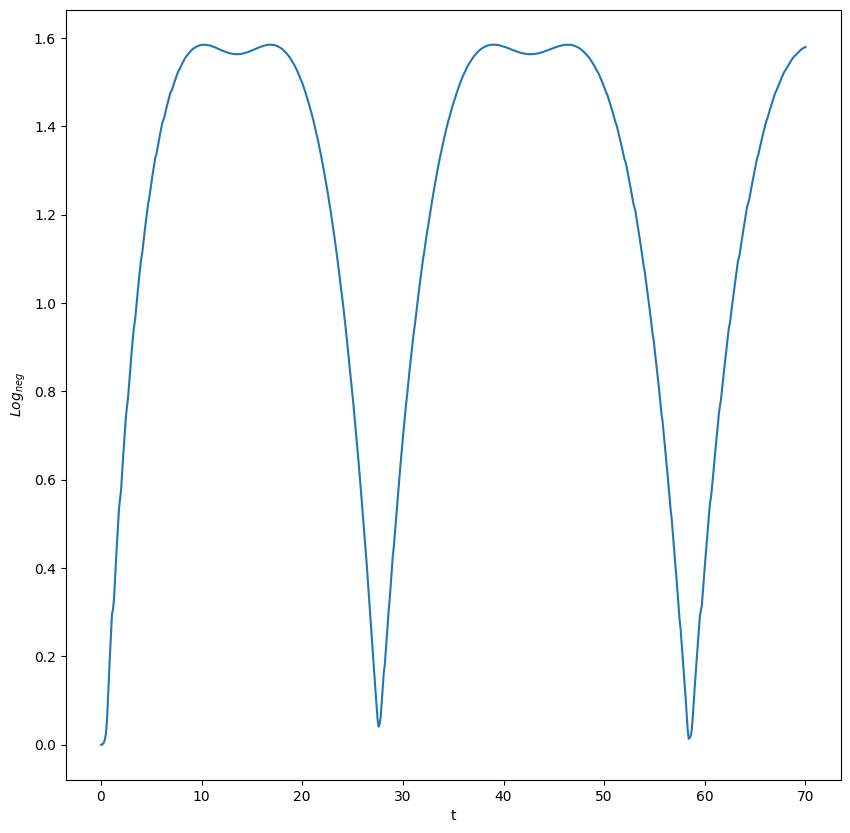

In [83]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(times,log_neg)
plt.xlabel("t")
plt.ylabel("$\it{Log}_{neg}$")
plt.savefig("log neg")
plt.show()

**$Quantum$ $coherence$ of the state $|11><11|$**

In [84]:
l1_coher = [0 for k in range(len(Y_solution))]
for m in range(len(Y_solution)):
  sum = 0
  for n in range(Y_solution[m].shape[0]):
    for p in range(Y_solution[m].shape[1]):
      sum += abs(Y_solution[m][n,p])
  l1_coher[m] = (1/8)*sum*10

In [99]:
times_n = np.arange(0, 100, 0.1)
times_n = np.append(times_n, 100)

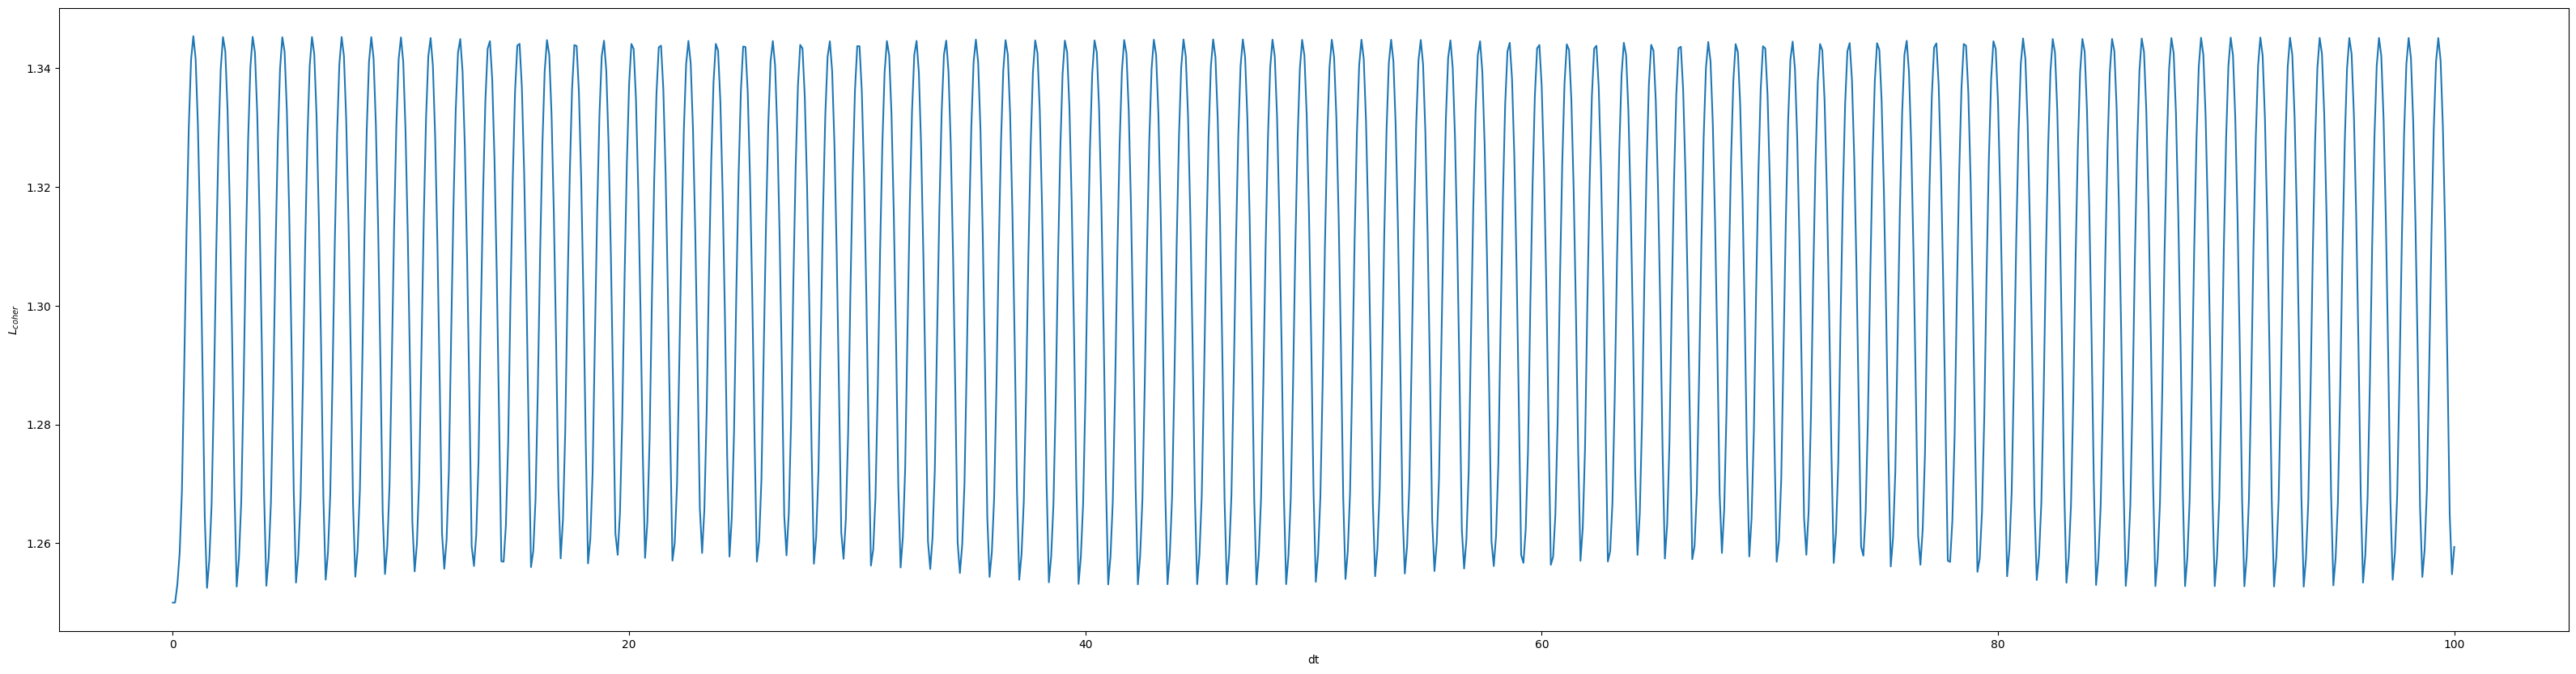

In [106]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,10)
plt.plot(times_n,l1_coher)
# plt.xlim(0,20)
plt.xlabel("dt")
plt.ylabel("$\it{L}_{coher}$")
plt.savefig("coherence")
plt.show()

**$Quantum$ $coherence$ of the state $|00><00|$**

In [88]:
l1_coher_0 = [0 for k in range(len(Y_solution_0))]
for m in range(len(Y_solution_0)):
  sum = 0
  for n in range(Y_solution_0[m].shape[0]):
    for p in range(Y_solution_0[m].shape[1]):
      sum += abs(Y_solution_0[m][n,p])
  l1_coher_0[m] = (1/8)*sum*10

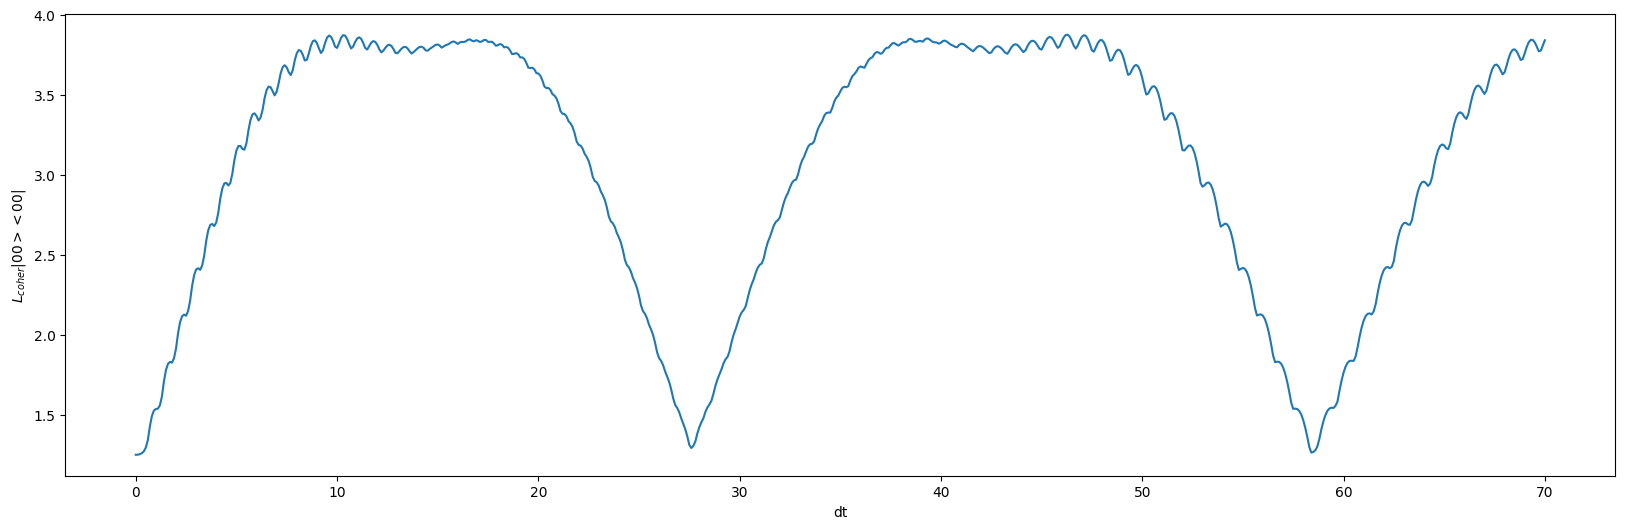

In [89]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)
plt.plot(times,l1_coher_0)
plt.xlabel("dt")
plt.ylabel("$\it{L}_{coher}|00><00|$")
plt.show()

**Explicit RK-4(needs fixing)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def matrix_rk4_step_state_dep(t, Y, dt, commute_Hs, calculate_D_rho):

    k_1 = commute_Hs(Y) + calculate_D_rho(de_11,S_omega,k1,omega_01,beta,h)
    k_2 = commute_Hs(Y + dt/2 * k_1) + calculate_D_rho(de_11,S_omega,k1,omega_01,beta,h)
    k_3 = commute_Hs(Y + dt/2 * k_2) + calculate_D_rho(de_11,S_omega,k1,omega_01,beta,h)
    k_4 = commute_Hs(Y + dt * k_3) + calculate_D_rho(de_11,S_omega,k1,omega_01,beta,h)

    Y_next = Y + dt/6 * (k_1 + 2*k_2 + 2*k_3 + k_4)
    return Y_next.astype(complex)

def solve_matrix_ode_rk4_state_dep(Y0, t_span, dt, A_func, B_func):
    t_start, t_end = t_span
    times = np.arange(t_start, t_end + dt, dt)
    num_time_points = len(times)
    n, m = Y0.shape
    solutions = np.zeros((num_time_points, n, m),dtype=complex)
    solutions[0] = Y0
    Y = Y0

    for i in range(num_time_points - 1):
        Y = matrix_rk4_step_state_dep(times[i], Y, dt, A_func, B_func)
        solutions[i+1] = Y.astype(complex)

    return times, solutions

t_span = (0, 10)
dt = 0.1
Y0 = de_11

times, Y_solution = solve_matrix_ode_rk4_state_dep(Y0, t_span, dt, commute_Hs,calculate_D_rho)

# Plot the results
n_rows, n_cols = Y0.shape
plt.figure(figsize=(12, 8))
for i in range(n_rows):
    for j in range(n_cols):
        plt.plot(times, Y_solution[:, i, j])

plt.xlabel('Time (t)')
plt.ylabel("Elements of Matrix $\it{\\rho_s(t)}$")
plt.title('Solution of State-Dependent Matrix Differential Equation using RK4')
plt.grid(True)
plt.show()

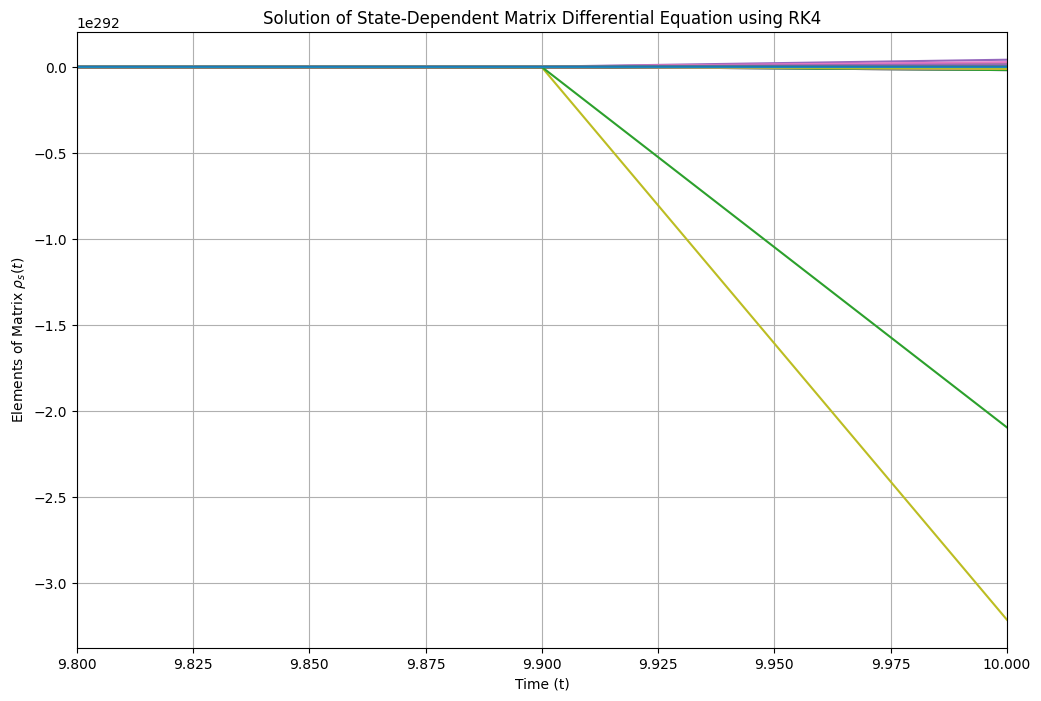

In [ ]:
#Plot the results

n_rows, n_cols = Y0.shape
plt.figure(figsize=(12, 8))
for i in range(n_rows):
    for j in range(n_cols):
        plt.plot(times, Y_solution[:, i, j])

plt.xlabel('Time (t)')
plt.ylabel("Elements of Matrix $\it{\\rho_s(t)}$")
plt.title('Solution of State-Dependent Matrix Differential Equation using RK4')
plt.grid(True)
plt.xlim(9.8,10)
plt.show()